# CS178 Project

In [6]:
# import library, module and training/evaluation data

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from mltools import dtree
%matplotlib inline


# Note: file is comma-delimited
X = np.genfromtxt("Data/kaggle.X1.train.txt",delimiter=',')
Y = np.genfromtxt("Data/kaggle.Y.train.txt",delimiter=',')

In [ ]:
# cross validation template
degree = [1, 3, 5, 7, 10, 18]
MSE = np.zeros(len(degree))
Phi = lambda t: ml.transforms.rescale( ml.transforms.fpoly(t, d, False), params)[0]

for i,d in enumerate(degree):            
    nFolds = 5;
    J = np.zeros(nFolds)
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold);
        XtiP = ml.transforms.fpoly(Xti, d, bias=False);
        XtiP,params = ml.transforms.rescale(XtiP);
        
        lr = ml.linear.linearRegress(Phi(Xti), Yti)
        J[iFold] = lr.mse(Phi(Xvi), Yvi)          
    MSE[i] = np.mean(J)  
    print d, MSE[i]


In [90]:
# random forest template
# Load data set X, Y for training the ensemble...
m, n = Xtr.shape
mTe, nTe = Xte.shape
nBag = 25
ensemble = []    
predict_tr = np.zeros( (m, nBag) )
predict_te = np.zeros( (mTe, nBag) )

# build ensemble[25]
for i in range(nBag):
    ind = np.floor( m * np.random.rand(m) ).astype(int) # Bootstrap sample a data set: 
    Xi, Yi = X[ind,:] , Y[ind] # select the data at those indices 
    dt = dtree.treeRegress(Xi,Yi, maxDepth = 10, minParent = 8, nFeatures = 50)
    ensemble.append(dt) # Train a model on data Xi, Yi    
    predict_tr[:, i] = np.ndarray.ravel(dt.predict(Xtr))
    predict_te[:, i] = np.ndarray.ravel(dt.predict(Xte)) # Apply each classifier


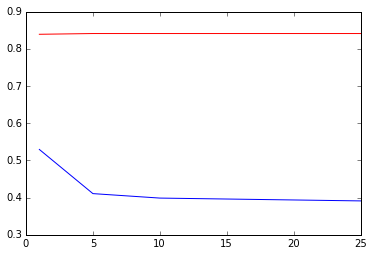

In [92]:
# calculate training && validation error rate for different # of learners
steps = [1, 5, 10, 25]
err_Tr = np.zeros( (4, 1) )
err_Te = np.zeros( (4, 1) )

for i in range(4):
    # training error rate:
    Ytr_hat = np.mean(predict_tr[:, 0:steps[i]], axis = 1) > 0
    err_Tr[i,0] = np.mean( (Ytr - Ytr_hat.reshape(Ytr.shape))**2 , axis=0)
    # validation error rate:
    Yte_hat = np.mean(predict_te[:, 0:steps[i]], axis = 1)
    err_Te[i,0] = np.mean( (Yte - Yte_hat.reshape(Yte.shape))**2 , axis=0)

# plot the training and validation error rate
plt.plot(steps, err_Tr, c = 'r') # red curve: training error rate
plt.plot(steps, err_Te, c = 'b') # blue curve: validation error rate

(b) Predict the test data

In [93]:
# writing prediction data
# Load data set X, Y for training the ensemble...
m, n = Xtest.shape
nBag = 6
ensemble = []    
predicts = np.zeros( (m, nBag) )
Xtest = np.genfromtxt("data/kaggle.X1.test.txt",delimiter=',')

for i in range(nBag):
    ind = np.floor( m * np.random.rand(m) ).astype(int) # Bootstrap sample a data set: 
    Xi, Yi = X[ind,:] , Y[ind] # select the data at those indices 
    dt = dtree.treeRegress(Xi,Yi, maxDepth = 10, minParent = 8, nFeatures = 50)
    ensemble.append(dt) # Train a model on data Xi, Yi    
    predicts[:, i] = np.ndarray.ravel(dt.predict(Xtest))


Ye = np.mean(predicts, axis = 1)       # make predictions

# Note: be sure Ye is a flat vector, shape (m,)
# otherwise, reshape it or change the code below:

fh = open('predictionsP3.csv','w')    # open file for upload
fh.write('ID,Prediction\n')         # output header line
for i,yi in enumerate(Ye):
  fh.write('{},{}\n'.format(i+1,yi)) # output each prediction
fh.close()  

print 'Writing finished!'

Writing finished!
